In [5]:
from sklearn.metrics import (confusion_matrix , 
                            precision_score, 
                            recall_score, 
                            classification_report)
import numpy as np

In [6]:
y_pred = np.array([0,0,1,0,1,0,1,1,0,1])
y_actual = np.array([1,0,1,0,0,1,1,1,0,1])

In [7]:
confusion_matrix(y_actual,y_pred)

array([[3, 1],
       [2, 4]])

In [8]:
precision_score(y_actual,y_pred)

0.8

In [9]:
recall_score(y_actual,y_pred)

0.6666666666666666

In [11]:
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.80      0.67      0.73         6

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



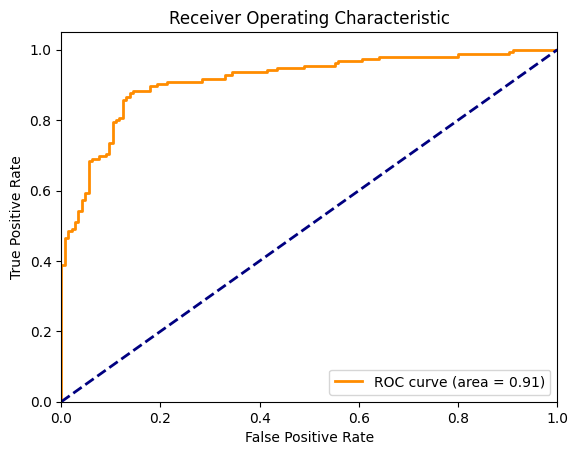

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
